In [1]:
import numpy as np
print(np.eye(5))

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


一元线性回归（normal equation）

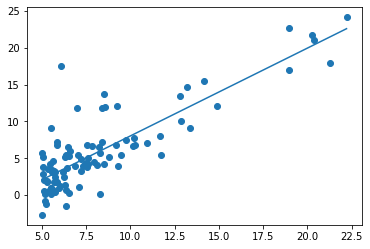

[[-3.89578088]
 [ 1.19303364]]


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def normal_equation(X, Y):
    return np.linalg.inv(X.T@X)@X.T@Y

path = 'ex1data1.txt'
data = pd.read_csv(path, header = None, names = ['population', 'profit'])
x = np.linspace(data['population'].min(), data['population'].max(), 2)
X = np.insert(np.matrix(data.iloc[:, :-1]), 0, values=1, axis=1)
Y = np.matrix(data.iloc[:, -1:])
theta = normal_equation(X, Y)
plt.scatter(data['population'], data['profit'])
plt.plot(x, theta[0, 0]+x*theta[1, 0])
plt.plot()
plt.show()
print(theta)

一元线性回归（gradient descent）

[[-3.89578088  1.19303364]]


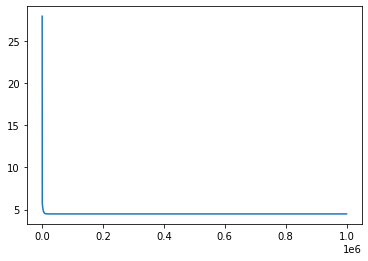

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cost = []
def cost_func(theta, X, Y):
    return np.sum(np.power((X@theta.T-Y), 2))/(2*Y.shape[0])

def grad_des(X, Y, theta, iters, alpha):
    for i in range(iters):
        Z  = X@theta.T-Y
        for j in range(X.shape[1]):
            buff = np.sum(np.multiply(Z, X[:, j]))
            theta[0, j] = theta[0, j]-alpha*buff/X.shape[0]
        cost.append(cost_func(theta, X, Y))
    return theta
    

alpha = 0.001
iters = 1000000
path = 'ex1data1.txt'
data = pd.read_csv(path, header = None, names = ['population', 'profit'])
X = np.insert(np.matrix(data.iloc[:, :-1]), 0, values=1, axis=1)
Y = np.matrix(data.iloc[:, -1:])
theta = np.matrix(np.zeros(X.shape[1]))
grad_des(X, Y, theta, iters, alpha)
plt.plot(np.arange(iters), cost)
print(theta)    

多元线性回归（gradient descent）

[[-1.10983917e-16  8.84764849e-01 -5.31776810e-02]]


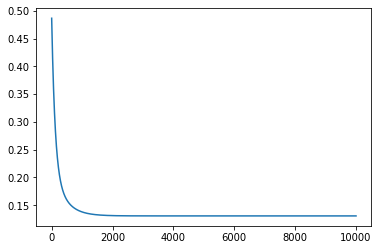

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cost = []
def cost_func(theta, X, Y):
    return np.sum(np.power((X@theta.T-Y), 2))/(2*Y.shape[0])

def grad_des(X, Y, theta, iters, alpha):
    for i in range(iters):
        Z  = X@theta.T-Y
        for j in range(X.shape[1]):
            buff = np.sum(np.multiply(Z, X[:, j]))
            theta[0, j] = theta[0, j]-alpha*buff/X.shape[0]
        cost.append(cost_func(theta, X, Y))
    return theta

alpha = 0.003
iters = 10000
path = 'ex1data2.txt'
data = pd.read_csv(path, header = None)
data = (data-data.mean())/data.std()
X = np.insert(np.matrix(data.iloc[:, :-1]), 0, values=1, axis=1)
Y = np.matrix(data.iloc[:, data.shape[1]-1:data.shape[1]])
theta = np.matrix(np.zeros(X.shape[1]))
grad_des(X, Y, theta, iters, alpha)
plt.plot(np.arange(iters), cost)
print(theta)    

# END